# 學習地圖:
### 3種迴歸模型:1.simple linear regression 2.multiple linear regression 3.logistic regression(分類用)

## 一、簡單迴歸模型
用氣溫來預測冰紅茶的銷售量。

1.印出係數、截距

In [2]:


import numpy as np
from sklearn.linear_model import LinearRegression

temperatures = np.array([29, 28, 34, 31, 25, 29, 32, 31, 24, 33, 25, 31, 26, 30])
iced_tea_sales = np.array([77, 62, 93, 84, 59, 64, 80, 75, 58, 91, 51, 73, 65, 84])

lm = LinearRegression()
lm.fit(np.reshape(temperatures, (len(temperatures), 1)), np.reshape(iced_tea_sales, (len(iced_tea_sales), 1)))

# 印出係數
print(lm.coef_)

# 印出截距
print(lm.intercept_ )

[[ 3.73788546]]
[-36.36123348]


2.訓練模型、預測販賣y:紅茶數(x帶入氣溫)

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

temperatures = np.array([29, 28, 34, 31, 25, 29, 32, 31, 24, 33, 25, 31, 26, 30])
iced_tea_sales = np.array([77, 62, 93, 84, 59, 64, 80, 75, 58, 91, 51, 73, 65, 84])

lm = LinearRegression()
lm.fit(np.reshape(temperatures, (len(temperatures), 1)), np.reshape(iced_tea_sales, (len(iced_tea_sales), 1)))

# 新的氣溫
to_be_predicted = np.array([30])
predicted_sales = lm.predict(np.reshape(to_be_predicted, (len(to_be_predicted), 1)))

# 預測的冰紅茶銷量
print(predicted_sales)

[[ 75.7753304]]


3.線性迴歸視覺化

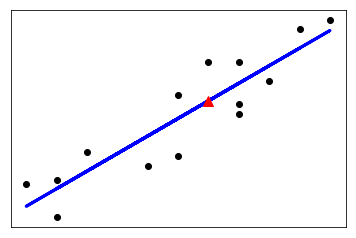

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

temperatures = np.array([29, 28, 34, 31, 25, 29, 32, 31, 24, 33, 25, 31, 26, 30])
iced_tea_sales = np.array([77, 62, 93, 84, 59, 64, 80, 75, 58, 91, 51, 73, 65, 84])

lm = LinearRegression()
lm.fit(np.reshape(temperatures, (len(temperatures), 1)), np.reshape(iced_tea_sales, (len(iced_tea_sales), 1)))

# 新的氣溫
to_be_predicted = np.array([30])
predicted_sales = lm.predict(np.reshape(to_be_predicted, (len(to_be_predicted), 1)))

# 視覺化
plt.scatter(temperatures, iced_tea_sales, color='black') #散佈圖
plt.plot(temperatures, lm.predict(np.reshape(temperatures, (len(temperatures), 1))), color='blue', linewidth=3) #plt.plot(x,y)
plt.plot(to_be_predicted, predicted_sales, color = 'red', marker = '^', markersize = 10) #預測的點
plt.xticks(()) #y軸單位
plt.yticks(()) #X軸單位
plt.show()

4.看線性迴歸模型的績效算
    (Mean squared error（MSE）與 R-squared。)

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression

temperatures = np.array([29, 28, 34, 31, 25, 29, 32, 31, 24, 33, 25, 31, 26, 30])
iced_tea_sales = np.array([77, 62, 93, 84, 59, 64, 80, 75, 58, 91, 51, 73, 65, 84])

# 轉換維度
temperatures = np.reshape(temperatures, (len(temperatures), 1))
iced_tea_sales = np.reshape(iced_tea_sales, (len(iced_tea_sales), 1))

lm = LinearRegression()
lm.fit(temperatures, iced_tea_sales)

# 模型績效
mse = np.mean((lm.predict(temperatures) - iced_tea_sales) ** 2)
r_squared = lm.score(temperatures, iced_tea_sales)

# 印出模型績效
print(mse)
print(r_squared)

27.9348646948
0.822509288117


## 二、複迴歸模型
### 使用連鎖蛋糕店的 店面面積（坪）與車站距離（公里）來預測分店單月銷售量（萬日圓）。

1.印出係數、截距

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([
    [10, 80], [8, 0], [8, 200], [5, 200], [7, 300], [8, 230], [7, 40], [9, 0], [6, 330], [9, 180]
])
y = np.array([469, 366, 371, 208, 246, 297, 363, 436, 198, 364])

lm = LinearRegression()
lm.fit(X, y)

# 印出係數
print(lm.coef_)

# 印出截距
print(lm.intercept_ )

[ 41.51347826  -0.34088269]
65.3239163889


2.訓練模型、預測販賣y:紅茶數(x:店租與人事成本)

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([
    [10, 80], [8, 0], [8, 200], [5, 200], [7, 300], [8, 230], [7, 40], [9, 0], [6, 330], [9, 180]
])
y = np.array([469, 366, 371, 208, 246, 297, 363, 436, 198, 364])

lm = LinearRegression()
lm.fit(X, y)

# 新蛋糕店資料
to_be_predicted = np.array([
    [10, 110]
])
predicted_sales = lm.predict(to_be_predicted)

# 預測新蛋糕店的單月銷量
print(predicted_sales)

[ 442.96160353]


3.看線性迴歸模型的績效算 (Mean squared error（MSE）與 R-squared。)

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([
    [10, 80], [8, 0], [8, 200], [5, 200], [7, 300], [8, 230], [7, 40], [9, 0], [6, 330], [9, 180]
])
y = np.array([469, 366, 371, 208, 246, 297, 363, 436, 198, 364])

lm = LinearRegression()
lm.fit(X, y)

# 模型績效
mse = np.mean((lm.predict(X) - y) ** 2)
r_squared = lm.score(X, y)
adj_r_squared = r_squared - (1 - r_squared) * (X.shape[1] / (X.shape[0] - X.shape[1] - 1))

# 印出模型績效
print(mse)
print(r_squared)
print(adj_r_squared)

417.300611999
0.945235852682
0.929588953448


5.複迴歸模型我們通常還會檢定變數的顯著性，以 P-value 是否小於 0.05（信心水準 95%）來判定。

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

X = np.array([
    [10, 80], [8, 0], [8, 200], [5, 200], [7, 300], [8, 230], [7, 40], [9, 0], [6, 330], [9, 180]
])
y = np.array([469, 366, 371, 208, 246, 297, 363, 436, 198, 364])

lm = LinearRegression()
lm.fit(X, y)

# 印出 p-value
print(f_regression(X, y)[1])

[ 0.00051435  0.00844837]


## 三、 Logistic 迴歸模型
### 在Kaggle 著名的鐵達尼克號資料，我們使用 Sex，Pclass 與 Age 來預測 Survived。

1.印出係數、截距

In [16]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model

url = "https://storage.googleapis.com/2017_ithome_ironman/data/kaggle_titanic_train.csv"
titanic_train = pd.read_csv(url)

# 將 Age 遺漏值以 median 填補
age_median = np.nanmedian(titanic_train["Age"])
new_Age = np.where(titanic_train["Age"].isnull(), age_median, titanic_train["Age"])
titanic_train["Age"] = new_Age
titanic_train

# 創造 dummy variables
label_encoder = preprocessing.LabelEncoder()
encoded_Sex = label_encoder.fit_transform(titanic_train["Sex"])

# 建立 train_X
train_X = pd.DataFrame([titanic_train["Pclass"],
                        encoded_Sex,
                        titanic_train["Age"]
]).T

# 建立模型
logistic_regr = linear_model.LogisticRegression()
logistic_regr.fit(train_X, titanic_train["Survived"])

# 印出係數
print(logistic_regr.coef_)

# 印出截距
print(logistic_regr.intercept_ )

[[-0.98136537 -2.40629309 -0.023991  ]]
[ 3.88051905]


2.Logistic 迴歸模型係數檢定
(檢定變數的顯著性，以 P-value 是否小於 0.05（信心水準 95%）來判定。)

In [17]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model
from sklearn.feature_selection import f_regression

url = "https://storage.googleapis.com/2017_ithome_ironman/data/kaggle_titanic_train.csv"
titanic_train = pd.read_csv(url)

# 將 Age 遺漏值以 median 填補
age_median = np.nanmedian(titanic_train["Age"])
new_Age = np.where(titanic_train["Age"].isnull(), age_median, titanic_train["Age"])
titanic_train["Age"] = new_Age
titanic_train

# 創造 dummy variables
label_encoder = preprocessing.LabelEncoder()
encoded_Sex = label_encoder.fit_transform(titanic_train["Sex"])

# 建立 train_X
train_X = pd.DataFrame([titanic_train["Pclass"],
                        encoded_Sex,
                        titanic_train["Age"]
]).T

# 建立模型
logistic_regr = linear_model.LogisticRegression()
logistic_regr.fit(train_X, titanic_train["Survived"])

# 印出 p-value
print(f_regression(train_X, titanic_train["Survived"])[1])

[  2.53704739e-25   1.40606613e-69   5.27606885e-02]


Logistic 迴歸模型績效
(用準確率（Accuracy）衡量二元分類模型的績效。)

In [18]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model

url = "https://storage.googleapis.com/2017_ithome_ironman/data/kaggle_titanic_train.csv"
titanic_train = pd.read_csv(url)

# 將 Age 遺漏值以 median 填補
age_median = np.nanmedian(titanic_train["Age"])
new_Age = np.where(titanic_train["Age"].isnull(), age_median, titanic_train["Age"])
titanic_train["Age"] = new_Age
titanic_train

# 創造 dummy variables
label_encoder = preprocessing.LabelEncoder()
encoded_Sex = label_encoder.fit_transform(titanic_train["Sex"])

# 建立 train_X
train_X = pd.DataFrame([titanic_train["Pclass"],
                        encoded_Sex,
                        titanic_train["Age"]
]).T

# 建立模型
logistic_regr = linear_model.LogisticRegression()
logistic_regr.fit(train_X, titanic_train["Survived"])

# 計算準確率
survived_predictions = logistic_regr.predict(train_X)
accuracy = logistic_regr.score(train_X, titanic_train["Survived"])
print(accuracy)

0.796857463524


In [22]:
print(survived_predictions)#預測存活

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0
 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 